In [ ]:
# Importando as Blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pmdarima
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
url = 'https://raw.githubusercontent.com/aaasatoou/bootcamp_blue_Projeto2/main/Estudo%20COVID%20-%20Insights%20e%20Previs%C3%B5es/dados/Silver/datasets/serie%20temporal%20pais/S%C3%A9ries%20Temporais%20Argentina.csv'

serie_arg = pd.read_csv(url)
serie_arg.drop(['Unnamed: 0','Confirmed','Recovered','Ano'],axis=1,
               inplace=True)
serie_arg.head()

,Date,Deaths
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [ ]:
# Selecionando apenas os primeiros meses do dataset
serie_arg = serie_arg[0:161]

In [ ]:
serie_arg['Date'] = pd.to_datetime(serie_arg['Date'],format='%Y-%m-%d')
serie_arg.set_index('Date',inplace=True)
serie_arg

,Deaths
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-06-26,1184
2020-06-27,1207
2020-06-28,1232


In [ ]:
treino = serie_arg[0:131]
treino

,Deaths
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-05-27,500
2020-05-28,508
2020-05-29,520


In [ ]:
teste = serie_arg[131:161]
teste.head()

,Deaths
Date,
2020-06-01,556
2020-06-02,569
2020-06-03,583
2020-06-04,608
2020-06-05,632


In [ ]:
step1 = auto_arima(treino['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=656.686, Time=0.22 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=649.990, Time=0.18 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=644.152, Time=0.61 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=646.773, Time=0.12 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=648.187, Time=0.31 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=642.902, Time=0.88 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=647.628, Time=0.31 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=644.944, Time=0.99 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=644.902, Time=1.35 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=658.652, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=650.111, Time=0.25 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=643.757, Time=0.90 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=645.842, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=647.770, Time=0.43 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=643.552, Time=1.94 sec
 ARIMA(0,1

In [ ]:
step2 = auto_arima(treino['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=604.429, Time=0.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=656.686, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=643.392, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=650.111, Time=0.24 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=660.497, Time=0.10 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=605.659, Time=0.93 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=605.705, Time=1.78 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=615.052, Time=0.44 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=607.664, Time=3.90 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=648.300, Time=0.23 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=604.777, Time=0.78 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=604.453, Time=0.71 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=649.990, Time=0.17 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=644.208, Time=0.32 sec
 ARIMA(2,1,0)(0,1,1)[12]         

In [ ]:
step1.fit(treino['Deaths'])

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
step2.fit(treino['Deaths'])

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
future_forecast=step1.predict(n_periods=len(teste))

In [ ]:
future_forecast1 = step2.predict(n_periods=len(teste))

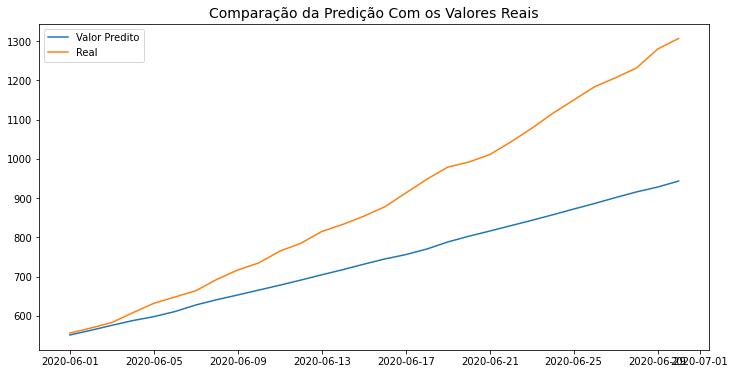

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [ ]:
mae = mean_absolute_error(teste['Deaths'],future_forecast)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast)
rmse = mean_squared_error(teste['Deaths'],future_forecast)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 150.6426810326239
MAPE: 0.14785710828933224
RMSE: 186.0727495059726


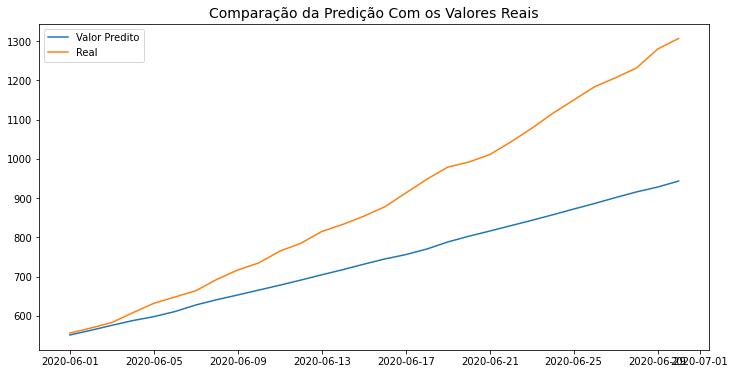

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast1,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [ ]:
mae = mean_absolute_error(teste['Deaths'],future_forecast1)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast1)
rmse = mean_squared_error(teste['Deaths'],future_forecast1)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 150.6426810326239
MAPE: 0.14785710828933224
RMSE: 186.0727495059726
